In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv(r"C:\PROGRAMMING\PROJECT\Body-Fitness-Prediction-master\DataSet\BodyFitnessPrediction.CSV ")
df

,date,step_count,mood,calories_burned,hours_of_sleep,bool_of_active,weight_kg
0,06-10-2017,5464,200,181,5,0,66
1,07-10-2017,6041,100,197,8,0,66
2,08-10-2017,25,100,0,5,0,66
3,09-10-2017,5461,100,174,4,0,66
4,10-10-2017,6915,200,223,5,500,66
...,...,...,...,...,...,...,...
667,04-08-2019,133,100,4,3,0,64
668,05-08-2019,153,300,4,8,0,64
669,06-08-2019,500,200,7,5,500,64
670,07-08-2019,2127,200,87,5,0,64


# Exploratory Data Analysis

In [4]:
df.shape

(672, 7)

In [5]:
df.columns

Index(['date', 'step_count', 'mood', 'calories_burned', 'hours_of_sleep',
       'bool_of_active', 'weight_kg'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             672 non-null    object
 1   step_count       672 non-null    int64 
 2   mood             672 non-null    int64 
 3   calories_burned  672 non-null    int64 
 4   hours_of_sleep   672 non-null    int64 
 5   bool_of_active   672 non-null    int64 
 6   weight_kg        672 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 36.9+ KB


In [7]:
df.count()

date               672
step_count         672
mood               672
calories_burned    672
hours_of_sleep     672
bool_of_active     672
weight_kg          672
dtype: int64

In [8]:
df.dtypes

date               object
step_count          int64
mood                int64
calories_burned     int64
hours_of_sleep      int64
bool_of_active      int64
weight_kg           int64
dtype: object

In [9]:
df['mood'].unique()

array([200, 100, 300], dtype=int64)

In [10]:
df['weight_kg'].unique()

array([66, 65, 64], dtype=int64)

In [11]:
df['weight_kg'].unique()

array([66, 65, 64], dtype=int64)

In [12]:
df.corr()

,step_count,mood,calories_burned,hours_of_sleep,bool_of_active,weight_kg
step_count,1.000000,0.278707,0.988923,0.155378,0.200615,0.103676
mood,0.278707,1.000000,0.268624,0.210364,0.407431,-0.402624
calories_burned,0.988923,0.268624,1.000000,0.152027,0.188440,0.107179
hours_of_sleep,0.155378,0.210364,0.152027,1.000000,0.142538,0.150635
bool_of_active,0.200615,0.407431,0.188440,0.142538,1.000000,-0.292042
weight_kg,0.103676,-0.402624,0.107179,0.150635,-0.292042,1.000000



Observations :

1:We can observe that there is a high positive correlation between the step_count and calories_burned (r = 0.98) indicating a strong correlation.
2:There is also a negative and moderate correlation between mood and body_weight (r = -0.40) and a moderate positive correlation between the feeling_of_active and mood (r = 0.41).

# Data Visualization :Univariate Analysis

<AxesSubplot:>

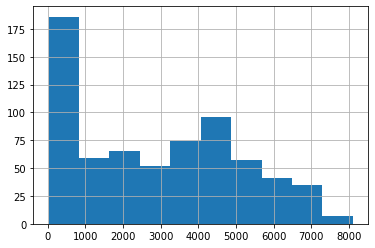

In [13]:
df['step_count'].hist() 

C:\Users\Sai Deepak\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='step_count', ylabel='Density'>

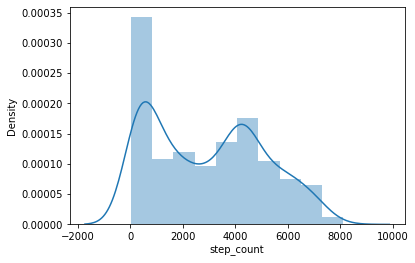

In [14]:
sns.distplot(df['step_count'])

<AxesSubplot:>

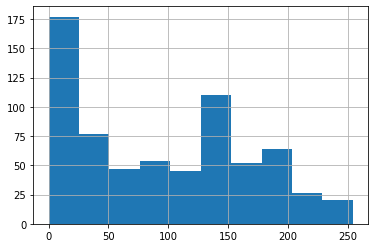

In [15]:
df['calories_burned'].hist()

C:\Users\Sai Deepak\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='calories_burned', ylabel='Density'>

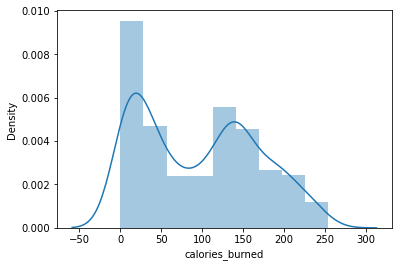

In [16]:
sns.distplot(df['calories_burned'])

<AxesSubplot:>

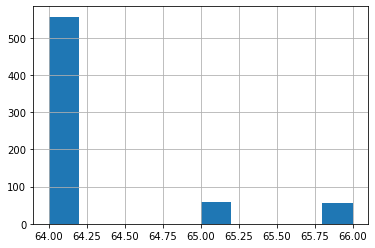

In [17]:

df['weight_kg'].hist()

In [18]:
df['weight_kg'].value_counts()

64    557
65     59
66     56
Name: weight_kg, dtype: int64

<AxesSubplot:>

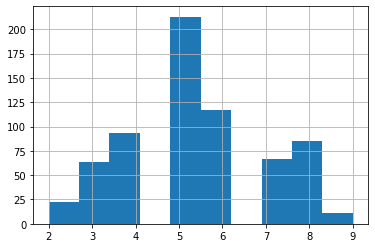

In [19]:
df['hours_of_sleep'].hist() 

<AxesSubplot:>

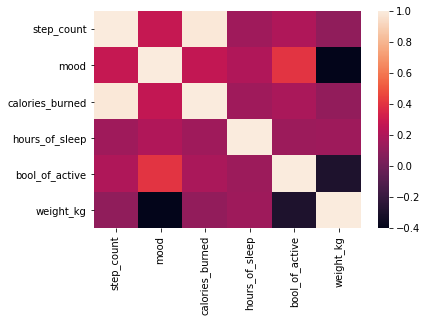

In [20]:
corr=df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)  #Heatmap

<AxesSubplot:xlabel='step_count', ylabel='calories_burned'>

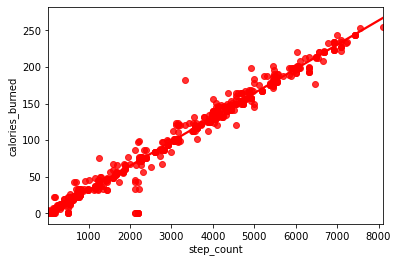

In [21]:
sns.regplot(x='step_count', y='calories_burned', data=df,color='r')

<AxesSubplot:xlabel='weight_kg', ylabel='mood'>

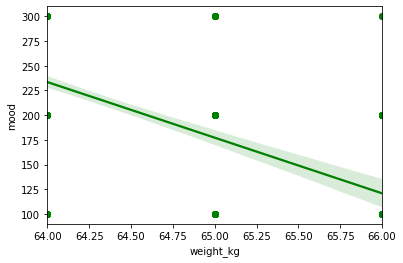

In [22]:
sns.regplot(x='weight_kg', y='mood', data=df,color='g')  #Regression plot between weight_kg and mood

<AxesSubplot:xlabel='mood', ylabel='bool_of_active'>

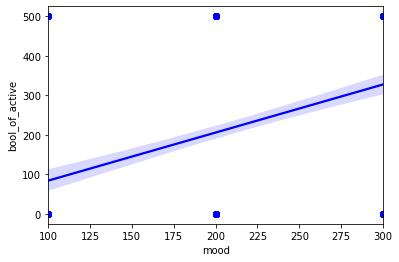

In [23]:
sns.regplot(x='mood', y='bool_of_active', data=df,color='b')  #Regression plot between mood and bool_of_active

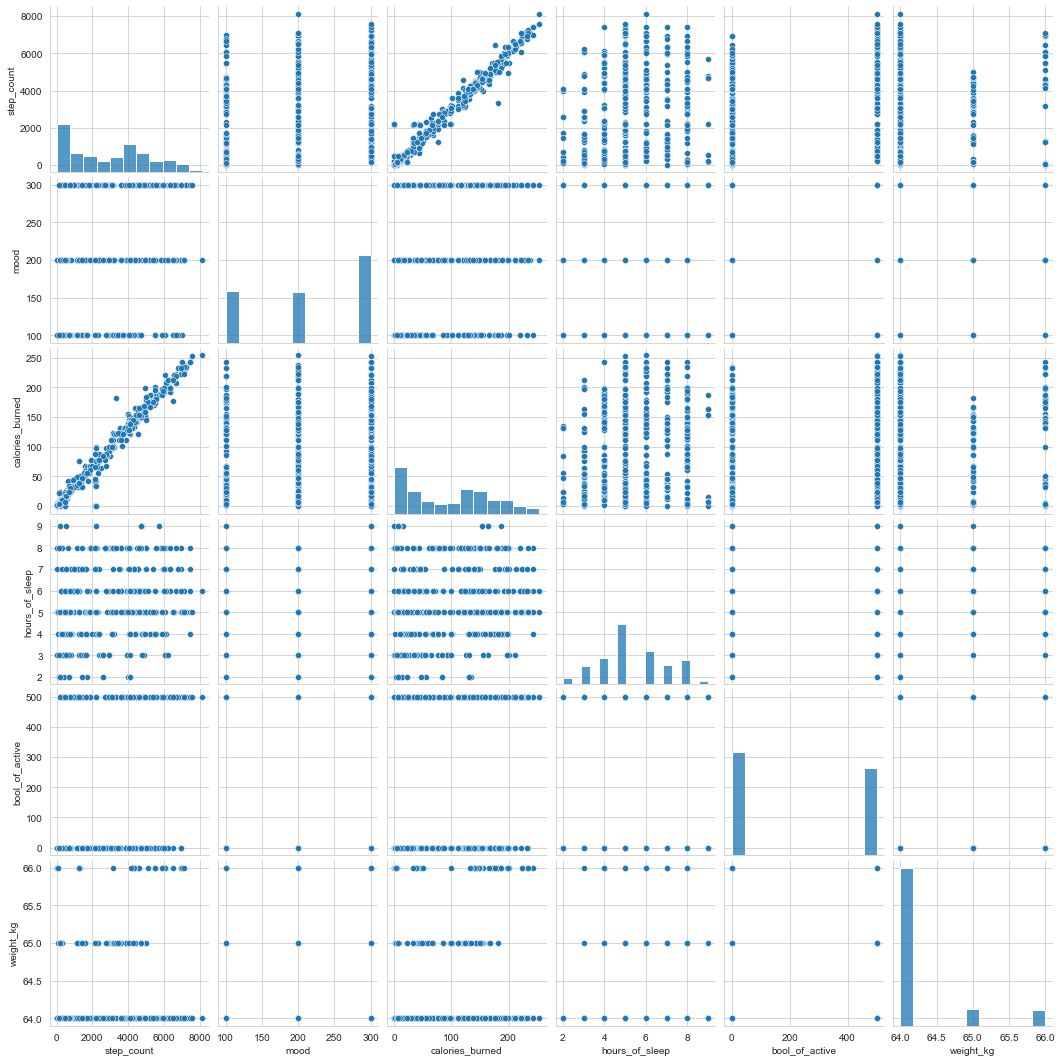

In [24]:
sns.set_style("whitegrid")
sns.pairplot(df)  #scatterplot of all variables

# Bivariate Analysis

In [25]:
#Average_descriptive statistics of step count by mood category (100 = sad, 200 = neutral and 300 = happy)
df.step_count.groupby(df.mood).describe()

,count,mean,std,min,25%,50%,75%,max
mood,,,,,,,,
100,182.0,1990.126374,1970.094038,25.0,299.0,1230.0,3586.0,6999.0
200,179.0,3027.094972,2140.411734,25.0,1163.0,2909.0,4390.5,8109.0
300,311.0,3469.594855,2076.114290,111.0,1425.0,4033.0,4880.0,7543.0


<Figure size 432x360 with 0 Axes>

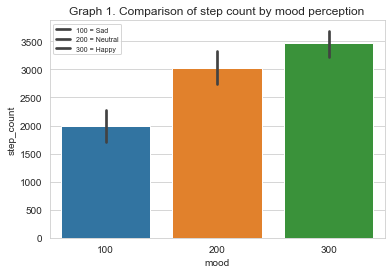

<Figure size 432x360 with 0 Axes>

In [26]:
# bar chart showing the distribution of the step count by mood category (100 = sad, 200 = neutral and 300 = happy)
sns.barplot(x = "mood", y="step_count", data = df)
plt.title('Graph 1. Comparison of step count by mood perception')
plt.legend(['100 = Sad', '200 = Neutral', '300 = Happy'], loc='upper left', prop={'size': 7})
plt.figure(figsize=(6,5))

# Step Count vs Activeness

In [27]:
#Average descriptive statistics_ of step count by Activeness (0 = inactive and 500 = active)
df.step_count.groupby(df.bool_of_active).describe()

,count,mean,std,min,25%,50%,75%,max
bool_of_active,,,,,,,,
0,364.0,2554.241758,1996.747594,25.0,546.0,2255.0,4340.0,6930.0
500,308.0,3419.977273,2235.748340,221.0,1163.0,3608.0,5000.5,8109.0


<Figure size 432x360 with 0 Axes>

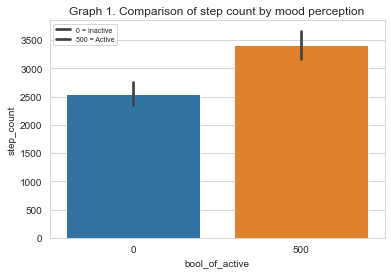

<Figure size 432x360 with 0 Axes>

In [28]:
# bar chart showing the distribution of step count by category of Activeness (0 = inactive and 500 = active)
sns.barplot(x = "bool_of_active", y="step_count", data = df)
plt.title('Graph 1. Comparison of step count by mood perception')
plt.legend(['0 = Inactive', '500 = Active'], loc='upper left', prop={'size': 7})
plt.figure(figsize=(6,5))

# 3. Calories Burned vs Mood

In [29]:
#Average descriptive statistics of CALORIES SPENT by mood category (100 = sad, 200 = neutral and 300 = happy)
df.calories_burned.groupby(df.mood).describe()

,count,mean,std,min,25%,50%,75%,max
mood,,,,,,,,
100,182.0,66.252747,65.101042,0.0,11.0,38.5,122.75,243.0
200,179.0,97.474860,72.416424,0.0,33.5,98.0,147.50,254.0
300,311.0,113.610932,69.837275,0.0,43.5,132.0,165.00,253.0


<Figure size 432x360 with 0 Axes>

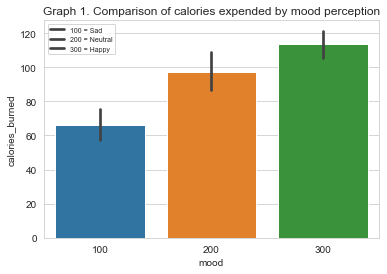

<Figure size 432x360 with 0 Axes>

In [30]:
# bar chart showing the distribution of SPENDED CALORIES by mood category (100 = sad, 200 = neutral and 300 = happy)
sns.barplot(x = "mood", y="calories_burned", data = df)
plt.title('Graph 1. Comparison of calories expended by mood perception')
plt.legend(['100 = Sad', '200 = Neutral', '300 = Happy'], loc='upper left', prop={'size': 7})
plt.figure(figsize=(6,5))

# Calories Burned vs Activeness

In [31]:
#Average descriptive statistics_ of CALORIES SPENT by Activeness (0 = inactive and 500 = active)
df.calories_burned.groupby(df.bool_of_active).describe()

,count,mean,std,min,25%,50%,75%,max
bool_of_active,,,,,,,,
0,364.0,84.030220,66.986506,0.0,19.25,74.5,142.25,234.0
500,308.0,111.207792,74.810656,0.0,35.00,120.0,168.25,254.0


<Figure size 432x360 with 0 Axes>

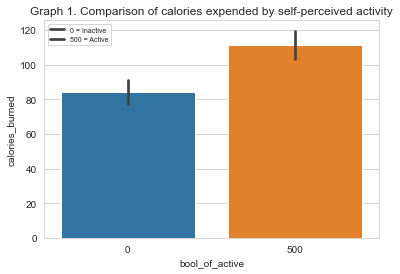

<Figure size 432x360 with 0 Axes>

In [32]:
# bar chart showing the distribution of EXPENDED CALORIES by category of Activeness (0 = inactive and 500 = active)
sns.barplot(x = "bool_of_active", y="calories_burned", data = df)
plt.title('Graph 1. Comparison of calories expended by self-perceived activity')
plt.legend(['0 = Inactive', '500 = Active'], loc='upper left', prop={'size': 7})
plt.figure(figsize=(6,5))

# 5. Sleeping Hours vs Mood

In [33]:
#Average descriptive statistics of HOURS OF SLEEP by mood category (100 = sad, 200 = neutral and 300 = happy)
df.hours_of_sleep.groupby(df.mood).describe()

,count,mean,std,min,25%,50%,75%,max
mood,,,,,,,,
100,182.0,5.093407,1.801491,2.0,4.0,5.0,6.0,9.0
200,179.0,4.927374,1.365827,2.0,4.0,5.0,6.0,8.0
300,311.0,5.832797,1.540115,2.0,5.0,6.0,7.0,9.0


<Figure size 432x360 with 0 Axes>

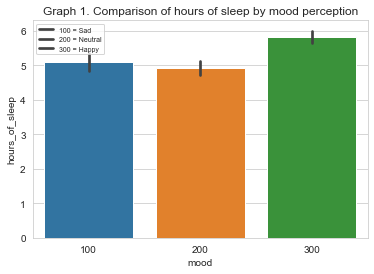

<Figure size 432x360 with 0 Axes>

In [34]:
# bar chart showing the distribution of SLEEP HOURS by mood category (100 = sad, 200 = neutral and 300 = happy)
sns.barplot(x = "mood", y="hours_of_sleep", data = df)
plt.title('Graph 1. Comparison of hours of sleep by mood perception')
plt.legend(['100 = Sad', '200 = Neutral', '300 = Happy'], loc='upper left', prop={'size': 7})
plt.figure(figsize=(6,5))

# Sleeping Hours vs Activeness

In [35]:
#Average descriptive statistics of SLEEP HOURS by self-perceived activity (0 = inactive and 500 = active)
df.hours_of_sleep.groupby(df.bool_of_active).describe()

,count,mean,std,min,25%,50%,75%,max
bool_of_active,,,,,,,,
0,364.0,5.178571,1.706730,2.0,4.0,5.0,6.0,9.0
500,308.0,5.642857,1.484682,2.0,5.0,5.0,7.0,9.0


<Figure size 432x360 with 0 Axes>

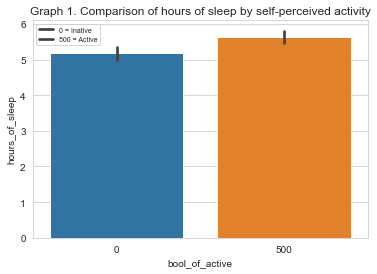

<Figure size 432x360 with 0 Axes>

In [36]:
# bar chart showing the distribution of SLEEP HOURS by category of self-perceived activity (0 = inactive and 500 = active)
sns.barplot(x = "bool_of_active", y="hours_of_sleep", data = df)
plt.title('Graph 1. Comparison of hours of sleep by self-perceived activity')
plt.legend(['0 = Inative', '500 = Active'], loc='upper left', prop={'size': 7})
plt.figure(figsize=(6,5))

# Mood vs Activeness

In [37]:
# creating a contingency table between feeling active or inactive (bool_of_activity) x humor (mood) in percentage
pd.crosstab([df. bool_of_active], [df.mood], normalize='index', margins=True)*100

mood,100,200,300
bool_of_active,,,
0,42.582418,26.923077,30.494505
500,8.766234,26.298701,64.935065
All,27.083333,26.636905,46.279762


<Figure size 432x360 with 0 Axes>

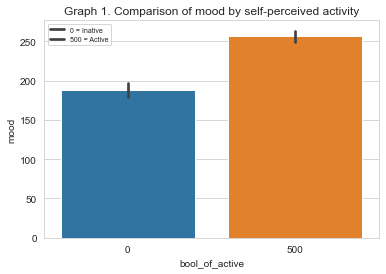

<Figure size 432x360 with 0 Axes>

In [38]:
# bar chart showing the distribution of MOOD by category of self-perceived activity (0 = inactive and 500 = active)
sns.barplot(x = "bool_of_active", y="mood", data = df)
plt.title('Graph 1. Comparison of mood by self-perceived activity')
plt.legend(['0 = Inative', '500 = Active'], loc='upper left', prop={'size': 7})
plt.figure(figsize=(6,5))

# Mood vs Weight

In [39]:
#Average descriptive statistics of MOOD by Weight
df.weight_kg.groupby(df.mood).describe()

,count,mean,std,min,25%,50%,75%,max
mood,,,,,,,,
100,182.0,64.637363,0.821217,64.0,64.0,64.0,65.0,66.0
200,179.0,64.229050,0.568899,64.0,64.0,64.0,64.0,66.0
300,311.0,64.045016,0.249966,64.0,64.0,64.0,64.0,66.0


<Figure size 432x360 with 0 Axes>

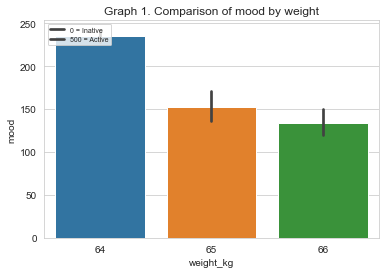

<Figure size 432x360 with 0 Axes>

In [40]:
# bar chart showing the distribution of MOOD by Weights
sns.barplot(x = "weight_kg", y="mood", data = df)
plt.title('Graph 1. Comparison of mood by weight')
plt.legend(['0 = Inative', '500 = Active'], loc='upper left', prop={'size': 7})
plt.figure(figsize=(6,5))


--> From the given data there is no much variance in weights. But some how we can say that less weight people tends to be more "happy" which inturn effects on activeness.

# Final Observation :
We want to predict whether a person is active or inactive which is a Binary classification problem based on hours slept, mood, daily step count, calories burned and weight.

Taking care of missing values

In [41]:
df.isnull().any()

date               False
step_count         False
mood               False
calories_burned    False
hours_of_sleep     False
bool_of_active     False
weight_kg          False
dtype: bool

# Outlier analysis using Boxplot

<AxesSubplot:>

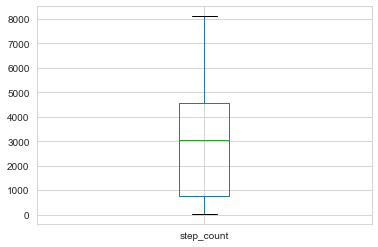

In [42]:
df.boxplot(column="step_count")  #Boxplot of Step_count

<AxesSubplot:>

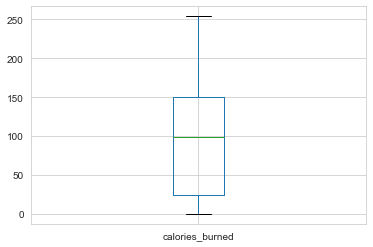

In [43]:
df.boxplot(column="calories_burned")  #Boxplot of calories_burned

<AxesSubplot:>

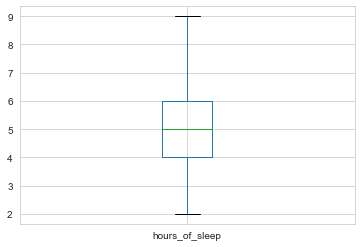

In [44]:
df.boxplot(column="hours_of_sleep")  #Boxplot of hours_of_sleep

<AxesSubplot:>

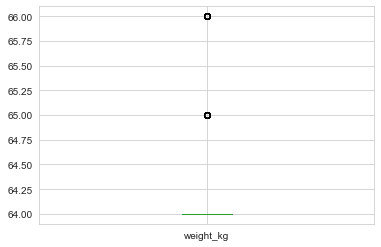

In [45]:
df.boxplot(column="weight_kg")  #Boxplot of weight_kg

<AxesSubplot:>

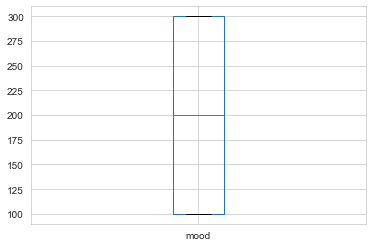

In [46]:
df.boxplot(column="mood")  #Boxplot of mood

<AxesSubplot:>

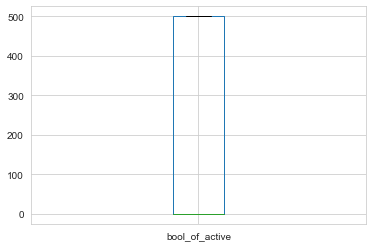

In [47]:
df.boxplot(column="bool_of_active")  #Boxplot of bool_of_active

# Label Encoding

"Mood" and "bool_of_active" are categorical variables but they are represented as --> bool_of_active : Active - 500 and Inactive - 0 --> mood : 100 - sad, 200 - neutral and 300 - happy Encode mood values as --> 100 - 0, 200 - 1 and 300 - 2 Encode bool_of_active values as --> 0 - 0 and 500 - 1

In [48]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['bool_of_active']=le.fit_transform(df['bool_of_active'])
df

,date,step_count,mood,calories_burned,hours_of_sleep,bool_of_active,weight_kg
0,06-10-2017,5464,200,181,5,0,66
1,07-10-2017,6041,100,197,8,0,66
2,08-10-2017,25,100,0,5,0,66
3,09-10-2017,5461,100,174,4,0,66
4,10-10-2017,6915,200,223,5,1,66
...,...,...,...,...,...,...,...
667,04-08-2019,133,100,4,3,0,64
668,05-08-2019,153,300,4,8,0,64
669,06-08-2019,500,200,7,5,1,64
670,07-08-2019,2127,200,87,5,0,64


In [49]:
df['mood']=le.fit_transform(df['mood'])
df

,date,step_count,mood,calories_burned,hours_of_sleep,bool_of_active,weight_kg
0,06-10-2017,5464,1,181,5,0,66
1,07-10-2017,6041,0,197,8,0,66
2,08-10-2017,25,0,0,5,0,66
3,09-10-2017,5461,0,174,4,0,66
4,10-10-2017,6915,1,223,5,1,66
...,...,...,...,...,...,...,...
667,04-08-2019,133,0,4,3,0,64
668,05-08-2019,153,2,4,8,0,64
669,06-08-2019,500,1,7,5,1,64
670,07-08-2019,2127,1,87,5,0,64


In [50]:
x = df.drop(['date','bool_of_active'],axis=1) #independent variables
x

,step_count,mood,calories_burned,hours_of_sleep,weight_kg
0,5464,1,181,5,66
1,6041,0,197,8,66
2,25,0,0,5,66
3,5461,0,174,4,66
4,6915,1,223,5,66
...,...,...,...,...,...
667,133,0,4,3,64
668,153,2,4,8,64
669,500,1,7,5,64
670,2127,1,87,5,64


In [51]:
y = df["bool_of_active"] #dependent variable
y

0      0
1      0
2      0
3      0
4      1
      ..
667    0
668    0
669    1
670    0
671    1
Name: bool_of_active, Length: 672, dtype: int64

In [52]:
from sklearn import model_selection, neighbors
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1,random_state=0)
x_train1=x_train
x_test1=x_test

# Feature Scaling

In [53]:
#Apply normalization to rescale the features to a standard range of values.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [54]:
x_train

array([[-1.15992048, -0.24183321, -1.26376434, -0.24541261, -0.42761284],
       [ 0.07183731,  0.9554394 ,  0.05451824, -0.24541261, -0.42761284],
       [ 0.66492329, -0.24183321,  0.64353811, -0.85540938,  1.24951803],
       ...,
       [ 1.17294701,  0.9554394 ,  1.17646086, -0.24541261,  2.92664889],
       [-0.84833886, -1.43910581, -0.87108442,  0.36458416, -0.42761284],
       [-1.04102131, -1.43910581, -0.9692544 , -0.24541261, -0.42761284]])

In [55]:
x_test

array([[ 0.54273442, -1.43910581,  0.489271  ,  0.36458416,  2.92664889],
       [-1.25767158, -0.24183321, -1.20766721, -0.24541261, -0.42761284],
       [-0.65236672, -1.43910581, -0.67474446, -0.24541261,  1.24951803],
       [-1.01893332, -1.43910581, -1.01132725, -0.85540938, -0.42761284],
       [ 0.28519788, -0.24183321,  0.26488248, -0.24541261, -0.42761284],
       [ 2.09312319,  0.9554394 ,  2.04596638,  1.5845777 , -0.42761284],
       [ 0.67197264,  0.9554394 ,  0.71365953, -0.24541261, -0.42761284],
       [ 0.04598967,  0.9554394 ,  0.02646967, -0.85540938, -0.42761284],
       [ 1.65982266, -0.24183321,  1.61121362, -0.24541261, -0.42761284],
       [ 0.08922573, -0.24183321,  0.05451824, -0.24541261, -0.42761284],
       [-1.14159215,  0.9554394 , -1.13754579, -0.24541261, -0.42761284],
       [ 0.67197264, -0.24183321,  0.69963524, -0.85540938, -0.42761284],
       [-1.11339472, -1.43910581, -1.03937581, -0.85540938, -0.42761284],
       [ 0.91635038,  0.9554394 ,  0.7

# Model Building :Random Forest Classification

In [56]:
from sklearn.ensemble import RandomForestClassifier
rmf = RandomForestClassifier(max_depth=12,n_estimators=10,random_state=0)  #max_depth=12
rmf.fit(x_train, y_train)

RandomForestClassifier(max_depth=12, n_estimators=10, random_state=0)

In [57]:
import pickle
#confusion matrix
from sklearn.metrics import confusion_matrix
#Cross Validation
from sklearn.model_selection import cross_val_score, cross_val_predict

In [58]:
rmf.score(x_train,y_train)*100

96.68874172185431

In [59]:
rmf.predict([[0,6041,197,8,66]])[0]

1

In [60]:
rmf_y_train=rmf.predict(x_train)
rmf_y_train

array([1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,

In [61]:
confusion_matrix(y_train, rmf_y_train)

array([[312,  14],
       [  6, 272]], dtype=int64)

In [62]:
rmf_clf_acc = cross_val_score(rmf, x_train, y_train, cv=5, scoring="accuracy",  n_jobs=-1)
rmf_proba = cross_val_predict(rmf, x_train, y_train, cv=5, method='predict_proba')
rmf_scores = rmf_proba[:, 1]

In [63]:
rmf_clf_acc*100

array([85.12396694, 82.6446281 , 85.12396694, 83.47107438, 75.83333333])

In [64]:
rmf_clf_acc.mean()*100

82.43939393939395

In [65]:
train=rmf.predict(x_test)
train

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1], dtype=int64)

In [66]:
x_test

array([[ 0.54273442, -1.43910581,  0.489271  ,  0.36458416,  2.92664889],
       [-1.25767158, -0.24183321, -1.20766721, -0.24541261, -0.42761284],
       [-0.65236672, -1.43910581, -0.67474446, -0.24541261,  1.24951803],
       [-1.01893332, -1.43910581, -1.01132725, -0.85540938, -0.42761284],
       [ 0.28519788, -0.24183321,  0.26488248, -0.24541261, -0.42761284],
       [ 2.09312319,  0.9554394 ,  2.04596638,  1.5845777 , -0.42761284],
       [ 0.67197264,  0.9554394 ,  0.71365953, -0.24541261, -0.42761284],
       [ 0.04598967,  0.9554394 ,  0.02646967, -0.85540938, -0.42761284],
       [ 1.65982266, -0.24183321,  1.61121362, -0.24541261, -0.42761284],
       [ 0.08922573, -0.24183321,  0.05451824, -0.24541261, -0.42761284],
       [-1.14159215,  0.9554394 , -1.13754579, -0.24541261, -0.42761284],
       [ 0.67197264, -0.24183321,  0.69963524, -0.85540938, -0.42761284],
       [-1.11339472, -1.43910581, -1.03937581, -0.85540938, -0.42761284],
       [ 0.91635038,  0.9554394 ,  0.7

# ROC Curves on Train data:

In [67]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [68]:
def ROC_curve(title, y_train, scores, y_train_pred, label=None):
    # calculate the ROC score
    fpr, tpr, thresholds = roc_curve(y_train, scores)
    print('AUC Score ({}): {:.2f} '.format(title, roc_auc_score(y_train, scores)*100))
    print()
    print('Train Accuracy : ',accuracy_score(y_train,y_train_pred)*100)
    
    # plot the ROC curve
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, linewidth=2, label=label, color='b')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC Curve: {}'.format(title), fontsize=16)
    plt.show()

AUC Score (Random Forest Classifier): 89.83 

Train Accuracy :  96.68874172185431


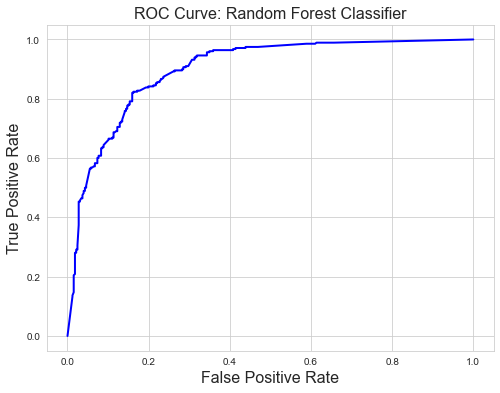

In [69]:
ROC_curve('Random Forest Classifier',y_train,rmf_scores,rmf_y_train)

# Observations :

WE USED Random Forest Classifier

On this traindata, Random Forest Classifer gives more accuracy and ROC score

# Testing Model

In [70]:
rmf=pickle.load(open('random.pkl','rb'))

In [71]:
rmf.score(x_test,y_test)*100

85.29411764705883

In [72]:
rmf_y_test=rmf.predict(x_test)
rmf_y_test

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1], dtype=int64)

In [73]:
confusion_matrix(y_test, rmf_y_test)

array([[32,  6],
       [ 4, 26]], dtype=int64)

In [74]:
rmf_clf_acc = cross_val_score(rmf, x_test, y_test, cv=3, scoring="accuracy",  n_jobs=-1)
rmf_proba = cross_val_predict(rmf, x_test, y_test, cv=3, method='predict_proba')
rmf_scores = rmf_proba[:, 1]

In [75]:
rmf_clf_acc*100

array([78.26086957, 69.56521739, 68.18181818])

In [76]:
rmf_clf_acc.mean()*100

72.0026350461133

# Evaluation :

In [77]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [78]:
print("\nAccuracy score: %f\n" %(accuracy_score(y_test,rmf_y_test) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_test, rmf_y_test) * 100))
print("Precision score : %f\n" %(precision_score(y_test, rmf_y_test) * 100))
print("Recall score : %f\n" %(recall_score(y_test, rmf_y_test) * 100))
print("Confusion matrix :")
print(confusion_matrix(y_test, rmf_y_test))


Accuracy score: 85.294118

ROC score : 85.438596

Precision score : 81.250000

Recall score : 86.666667

Confusion matrix :
[[32  6]
 [ 4 26]]


# ROC Curves on Test data :

In [79]:
def ROC_curve(title, y_test, scores, y_test_pred, label=None):
    # calculate the ROC score
    fpr, tpr, thresholds = roc_curve(y_test, scores)
    print('AUC Score ({}): {:.2f} '.format(title, roc_auc_score(y_test, scores)*100))
    print()
    print('Test Accuracy : ',accuracy_score(y_test,y_test_pred)*100)
    
    # plot the ROC curve
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, linewidth=2, label=label, color='b')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC Curve: {}'.format(title), fontsize=16)
    plt.show()

AUC Score (Random Forest Classifier): 80.83 

Test Accuracy :  85.29411764705883


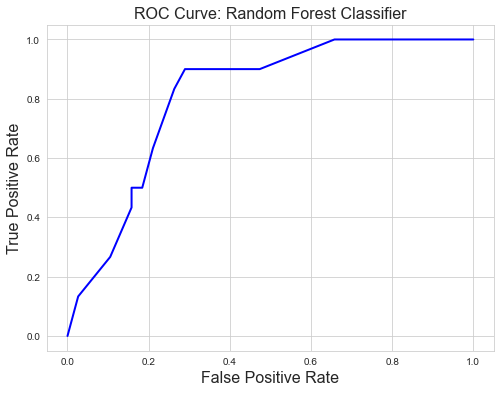

In [80]:
ROC_curve('Random Forest Classifier',y_test,rmf_scores,rmf_y_test)

# Observations :

# Predicting new values :

In [84]:
input_data = (0,6024,223,8,66)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rmf.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
  print('Active')
else:
  print('Inactive')

[1]
Inactive


In [82]:
import pickle
with open('random.pkl','wb') as f:
    pickle.dump(rmf,f)

In [83]:
rnd_model = pickle.load(open('random.pkl','rb'))
rnd_model.predict([[0,0,0,0,0]])[0]

1